In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("Datensatz.csv")

C:\Users\Florian\AppData\Local\Temp\ipykernel_10964\668810773.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Datensatz.csv")


In [4]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
Y = df["skill_level"]
X = df[['minute',
       'player1_xp', 'player1_totalGold', 'player1_totalDamageDoneToChampions',
       'player1_totalDamageTaken', 'player1_level', 'player1_currentGold',
       'player1_minionsKilled', 'player1_jungleMinionsKilled', 'player2_xp',
       'player2_totalGold', 'player2_totalDamageDoneToChampions',
       'player2_totalDamageTaken', 'player2_level', 'player2_currentGold',
       'player2_minionsKilled', 'player2_jungleMinionsKilled', 'player3_xp',
       'player3_totalGold', 'player3_totalDamageDoneToChampions',
       'player3_totalDamageTaken', 'player3_level', 'player3_currentGold',
       'player3_minionsKilled', 'player3_jungleMinionsKilled', 'player4_xp',
       'player4_totalGold', 'player4_totalDamageDoneToChampions',
       'player4_totalDamageTaken', 'player4_level', 'player4_currentGold',
       'player4_minionsKilled', 'player4_jungleMinionsKilled', 'player5_xp',
       'player5_totalGold', 'player5_totalDamageDoneToChampions',
       'player5_totalDamageTaken', 'player5_level', 'player5_currentGold',
       'player5_minionsKilled', 'player5_jungleMinionsKilled', 'player6_xp',
       'player6_totalGold', 'player6_totalDamageDoneToChampions',
       'player6_totalDamageTaken', 'player6_level', 'player6_currentGold',
       'player6_minionsKilled', 'player6_jungleMinionsKilled', 'player7_xp',
       'player7_totalGold', 'player7_totalDamageDoneToChampions',
       'player7_totalDamageTaken', 'player7_level', 'player7_currentGold',
       'player7_minionsKilled', 'player7_jungleMinionsKilled', 'player8_xp',
       'player8_totalGold', 'player8_totalDamageDoneToChampions',
       'player8_totalDamageTaken', 'player8_level', 'player8_currentGold',
       'player8_minionsKilled', 'player8_jungleMinionsKilled', 'player9_xp',
       'player9_totalGold', 'player9_totalDamageDoneToChampions',
       'player9_totalDamageTaken', 'player9_level', 'player9_currentGold',
       'player9_minionsKilled', 'player9_jungleMinionsKilled', 'player10_xp',
       'player10_totalGold', 'player10_totalDamageDoneToChampions',
       'player10_totalDamageTaken', 'player10_level', 'player10_currentGold',
       'player10_minionsKilled', 'player10_jungleMinionsKilled', 'winningTeam']]

In [6]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.3, random_state=42, shuffle=True) 

## Lineare Regression

In [7]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [24]:
print('Model RMSE score with Linear-Regression : {0:0.4f}'. format(mean_squared_error(y_test, y_pred.round(), squared=False)))

Model RMSE score with Linear-Regression : 7.8215


In [9]:
tracking_error = round(y_pred-y_test)

Text(0, 0.5, 'occurences')

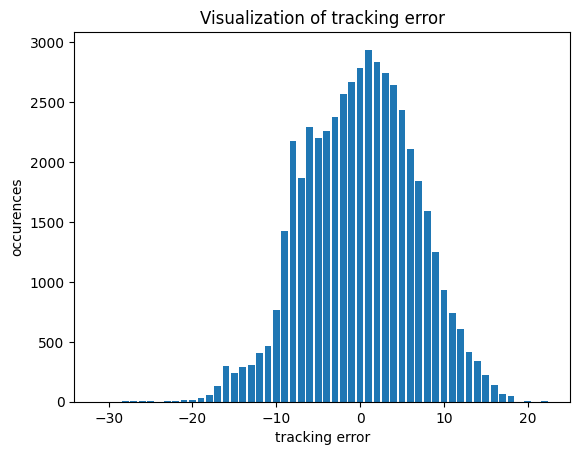

In [10]:
ax = plt.bar(tracking_error.value_counts().index, tracking_error.value_counts())
plt.title("Visualization of tracking error")
plt.xlabel("tracking error")
plt.ylabel("occurences")

In [11]:
df_combined = [tracking_error, y_test]
df_tracking_error = pd.concat( df_combined,axis=1,ignore_index=True)
df_tracking_error.columns = ["tracking_error", "y_test"]

tracking_error_iron = df_tracking_error.loc[df_tracking_error["y_test"]<=3, "tracking_error"]
tracking_error_bronze = df_tracking_error.loc[((df_tracking_error["y_test"]<=7) & (df_tracking_error["y_test"] > 3)), "tracking_error"]
tracking_error_silver = df_tracking_error.loc[((df_tracking_error["y_test"]<=11) & (df_tracking_error["y_test"] > 7)), "tracking_error"]
tracking_error_gold = df_tracking_error.loc[((df_tracking_error["y_test"]<=15) & (df_tracking_error["y_test"] > 11)), "tracking_error"]
tracking_error_platin = df_tracking_error.loc[((df_tracking_error["y_test"]<=19) & (df_tracking_error["y_test"] > 15)), "tracking_error"]
tracking_error_diamond = df_tracking_error.loc[((df_tracking_error["y_test"]<=23) & (df_tracking_error["y_test"] > 19)), "tracking_error"]
tracking_error_master = df_tracking_error.loc[df_tracking_error["y_test"]==24, "tracking_error"]
tracking_error_grandmaster = df_tracking_error.loc[df_tracking_error["y_test"]==28, "tracking_error"]
tracking_error_challenger = df_tracking_error.loc[df_tracking_error["y_test"]==32, "tracking_error"]


[]

<Figure size 1000x1000 with 0 Axes>

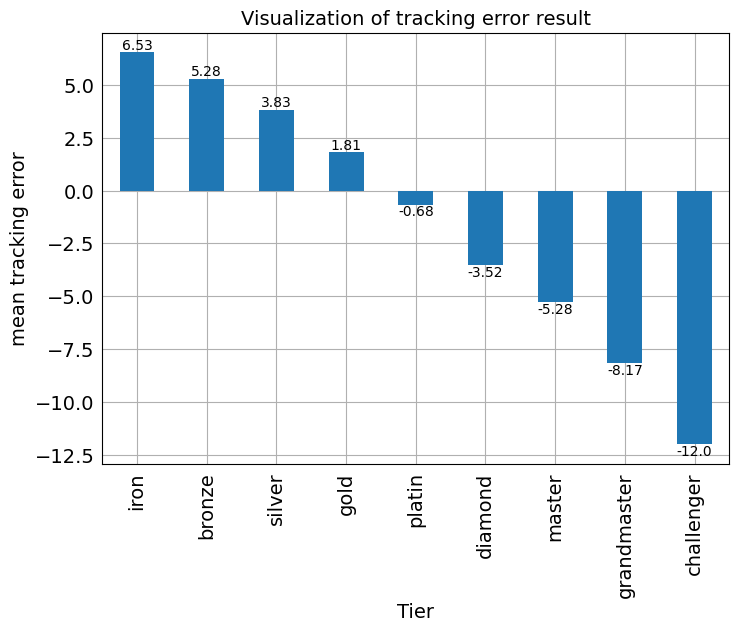

In [12]:
plt.style.use('_mpl-gallery')
plt.style.use('seaborn-v0_8-paper')
plt.figure(figsize=(10,10))
list_tracking_error = [tracking_error_iron.mean(), tracking_error_bronze.mean(), tracking_error_silver.mean(), tracking_error_gold.mean(), tracking_error_platin.mean(),
                      tracking_error_diamond.mean(), tracking_error_master.mean(), tracking_error_grandmaster.mean(), tracking_error_challenger.mean()]

ranks = ["iron", "bronze", "silver", "gold", "platin","diamond", "master", "grandmaster", "challenger"]
d = {"Tracking Error": list_tracking_error, "ranks": ranks}
df_plot = pd.DataFrame(data=d)
ax = df_plot.plot(kind='bar', title='LR Skill Prediction Result Plot ', legend=False)
#splot=sns.barplot(x=["iron", "bronze", "silver", "gold", "platin","diamond", "master", "grandmaster", "challenger"],data=list_tracking_error)
#ax = plt.bar(["iron", "bronze", "silver", "gold", "platin","diamond", "master", "grandmaster", "challenger"], list_tracking_error)
plt.title("Visualization of tracking error result", fontsize=14)
plt.xlabel("Tier", fontsize=14)
plt.ylabel("mean tracking error", fontsize=14)
plt.xticks(np.arange(9), ("iron", "bronze", "silver", "gold", "platin","diamond", "master", "grandmaster", "challenger"), fontsize=14, rotation=90)
plt.yticks(fontsize=14)
ax.bar_label(ax.containers[0])

for text in ax.texts:
    t = float(text.get_text())                 
    text.set_text(round(t, 2))
plt.plot()

## Random Forrest

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [25]:
print('Model RMSE score with Random-Forest-Classifier : {0:0.4f}'. format(mean_squared_error(y_test, y_pred, squared=False)))

Model RMSE score with Random-Forest-Classifier : 7.8215


In [16]:
tracking_error = round(y_pred-y_test)

Text(0, 0.5, 'occurences')

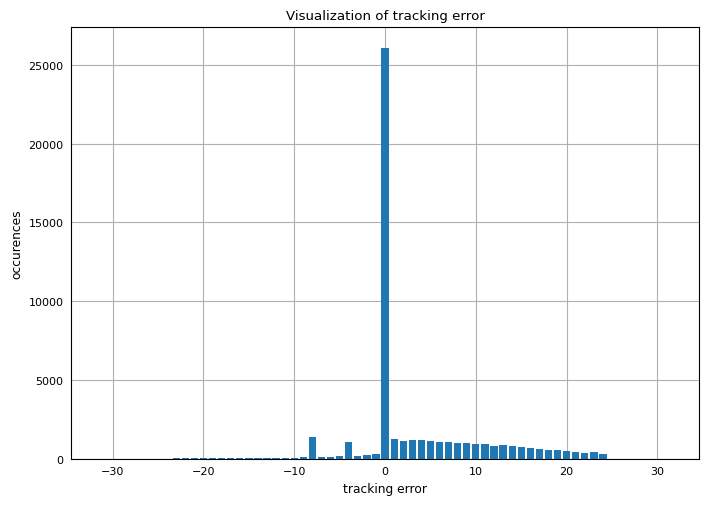

In [17]:
ax = plt.bar(tracking_error.value_counts().index, tracking_error.value_counts())
plt.title("Visualization of tracking error")
plt.xlabel("tracking error")
plt.ylabel("occurences")

In [18]:
df_combined = [tracking_error, y_test]
df_tracking_error = pd.concat( df_combined,axis=1,ignore_index=True)
df_tracking_error.columns = ["tracking_error", "y_test"]

tracking_error_iron = df_tracking_error.loc[df_tracking_error["y_test"]<=3, "tracking_error"]
tracking_error_bronze = df_tracking_error.loc[((df_tracking_error["y_test"]<=7) & (df_tracking_error["y_test"] > 3)), "tracking_error"]
tracking_error_silver = df_tracking_error.loc[((df_tracking_error["y_test"]<=11) & (df_tracking_error["y_test"] > 7)), "tracking_error"]
tracking_error_gold = df_tracking_error.loc[((df_tracking_error["y_test"]<=15) & (df_tracking_error["y_test"] > 11)), "tracking_error"]
tracking_error_platin = df_tracking_error.loc[((df_tracking_error["y_test"]<=19) & (df_tracking_error["y_test"] > 15)), "tracking_error"]
tracking_error_diamond = df_tracking_error.loc[((df_tracking_error["y_test"]<=23) & (df_tracking_error["y_test"] > 19)), "tracking_error"]
tracking_error_master = df_tracking_error.loc[df_tracking_error["y_test"]==24, "tracking_error"]
tracking_error_grandmaster = df_tracking_error.loc[df_tracking_error["y_test"]==28, "tracking_error"]
tracking_error_challenger = df_tracking_error.loc[df_tracking_error["y_test"]==32, "tracking_error"]

[]

<Figure size 1000x1000 with 0 Axes>

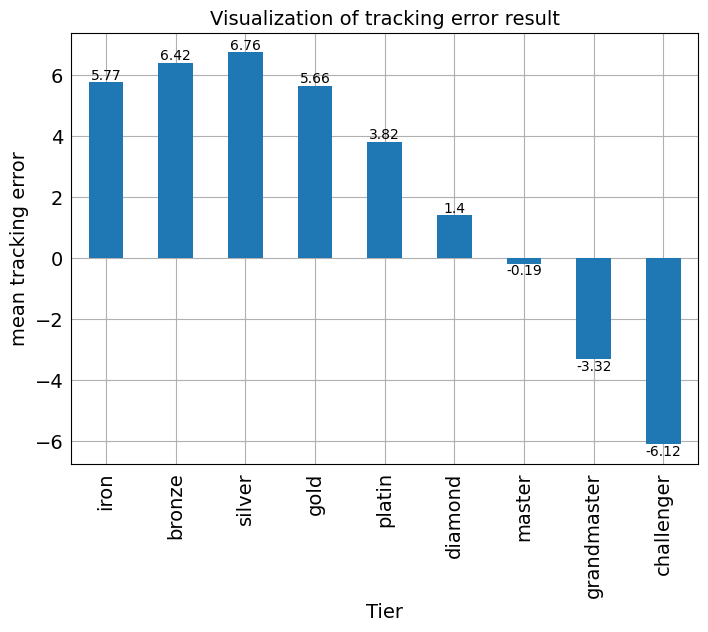

In [19]:
plt.style.use('_mpl-gallery')
plt.style.use('seaborn-v0_8-paper')
plt.figure(figsize=(10,10))
list_tracking_error = [tracking_error_iron.mean(), tracking_error_bronze.mean(), tracking_error_silver.mean(), tracking_error_gold.mean(), tracking_error_platin.mean(),
                      tracking_error_diamond.mean(), tracking_error_master.mean(), tracking_error_grandmaster.mean(), tracking_error_challenger.mean()]

ranks = ["iron", "bronze", "silver", "gold", "platin","diamond", "master", "grandmaster", "challenger"]
d = {"Tracking Error": list_tracking_error, "ranks": ranks}
df_plot = pd.DataFrame(data=d)
ax = df_plot.plot(kind='bar', title='LR Skill Prediction Result Plot ', legend=False)
#splot=sns.barplot(x=["iron", "bronze", "silver", "gold", "platin","diamond", "master", "grandmaster", "challenger"],data=list_tracking_error)
#ax = plt.bar(["iron", "bronze", "silver", "gold", "platin","diamond", "master", "grandmaster", "challenger"], list_tracking_error)
plt.title("Visualization of tracking error result", fontsize=14)
plt.xlabel("Tier", fontsize=14)
plt.ylabel("mean tracking error", fontsize=14)
plt.xticks(np.arange(9), ("iron", "bronze", "silver", "gold", "platin","diamond", "master", "grandmaster", "challenger"), fontsize=14, rotation=90)
plt.yticks(fontsize=14)
ax.bar_label(ax.containers[0])

for text in ax.texts:
    t = float(text.get_text())                 
    text.set_text(round(t, 2))
plt.plot()

In [20]:
abs(tracking_error_master).mean()

0.21515213815789475

In [21]:
tracking_error_iron.mean()

5.773381294964029

[]

<Figure size 1000x1000 with 0 Axes>

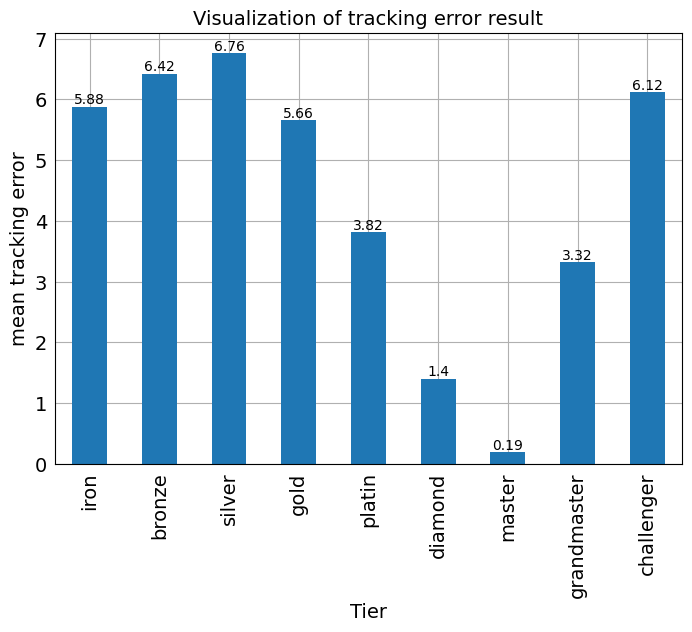

In [22]:
plt.style.use('_mpl-gallery')
plt.style.use('seaborn-v0_8-paper')
plt.figure(figsize=(10,10))
list_tracking_error = [abs(tracking_error_iron).mean(), abs(tracking_error_bronze.mean()), abs(tracking_error_silver.mean()), abs(tracking_error_gold.mean()), abs(tracking_error_platin.mean()),
                       abs(tracking_error_diamond.mean()), abs(tracking_error_master.mean()), abs(tracking_error_grandmaster.mean()), abs(tracking_error_challenger.mean())]

ranks = ["iron", "bronze", "silver", "gold", "platin","diamond", "master", "grandmaster", "challenger"]
d = {"Tracking Error": list_tracking_error, "ranks": ranks}
df_plot = pd.DataFrame(data=d)
ax = df_plot.plot(kind='bar', title='LR Skill Prediction Result Plot ', legend=False)
#splot=sns.barplot(x=["iron", "bronze", "silver", "gold", "platin","diamond", "master", "grandmaster", "challenger"],data=list_tracking_error)
#ax = plt.bar(["iron", "bronze", "silver", "gold", "platin","diamond", "master", "grandmaster", "challenger"], list_tracking_error)
plt.title("Visualization of tracking error result", fontsize=14)
plt.xlabel("Tier", fontsize=14)
plt.ylabel("mean tracking error", fontsize=14)
plt.xticks(np.arange(9), ("iron", "bronze", "silver", "gold", "platin","diamond", "master", "grandmaster", "challenger"), fontsize=14, rotation=90)
plt.yticks(fontsize=14)
ax.bar_label(ax.containers[0])

for text in ax.texts:
    t = float(text.get_text())                 
    text.set_text(round(t, 2))
plt.plot()